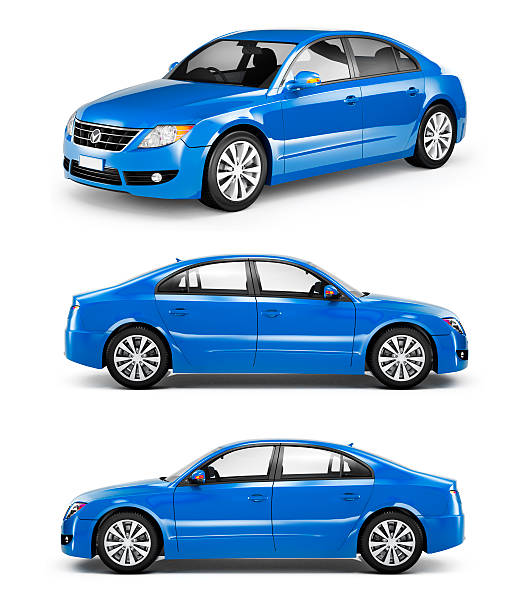

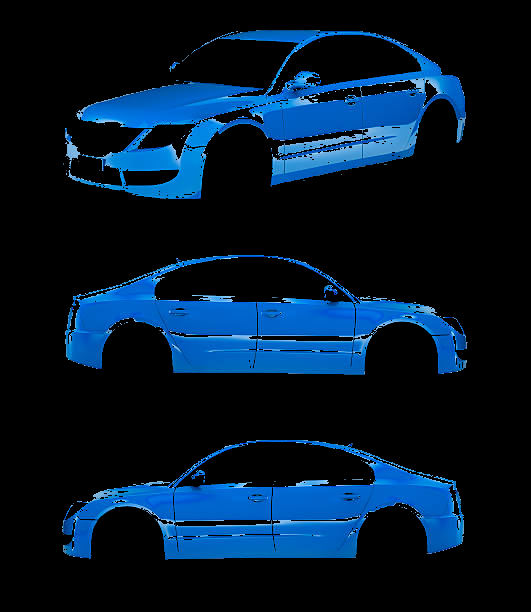

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Function to detect color
def detect_color(image, color):
    # Convert image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the range of color in HSV
    if color == 'red':
        lower_range = np.array([0, 100, 100])
        upper_range = np.array([10, 255, 255])
        mask1 = cv2.inRange(hsv_image, lower_range, upper_range)
        lower_range = np.array([160, 100, 100])
        upper_range = np.array([179, 255, 255])
        mask2 = cv2.inRange(hsv_image, lower_range, upper_range)
        mask = mask1 + mask2
    elif color == 'blue':
        lower_range = np.array([100, 100, 100])
        upper_range = np.array([130, 255, 255])
        mask = cv2.inRange(hsv_image, lower_range, upper_range)
    elif color == 'green':
        lower_range = np.array([40, 100, 100])
        upper_range = np.array([80, 255, 255])
        mask = cv2.inRange(hsv_image, lower_range, upper_range)
    else:
        print("Color not supported.")
        return

    # Bitwise-AND mask and original image
    result = cv2.bitwise_and(image, image, mask=mask)

    # Display the original image and the color-detected result
    cv2_imshow(image)
    cv2_imshow(result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Load image
image = cv2.imread('/content/car.jpg')

# Detect color
detect_color(image, 'blue')